In [1]:
import pandas as pd

# Read the Hebrew-named CSV "טבלה 3.csv" as a DataFrame
joined_table = pd.read_csv("HRDB_DATA.csv", encoding="utf-8")
print(joined_table.head())


   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2  Female          94   
1               2                        3    Male          61   
2               4                        4    Male          92   
3               5                        4  Female          56   
4               7                        1    Male          40   

   JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0               3         2        Sales Executive                4   
1               2         2     Research Scientist                2   
2               2         1  Laboratory Technician                3   
3               3         1     Research Scientist                3   
4               3         1  Laboratory Technician                2   

  MaritalStatus  MonthlyIncome  ...  YearsWithCurrManager  Age Attrition  \
0        Single           5993  ...                     5   41       Yes   
1       Married         

In [2]:
# Count the number of employees who left ("Yes") and who did not leave ("No") in the Attrition column, and show percentages
attrition_counts = joined_table['Attrition'].value_counts()
total_employees = attrition_counts.sum()
num_left = attrition_counts.get("Yes", 0)
num_not_left = attrition_counts.get("No", 0)
percent_left = (num_left / total_employees) * 100 if total_employees > 0 else 0
percent_not_left = (num_not_left / total_employees) * 100 if total_employees > 0 else 0

print(f"Number of employees who left (Yes): {num_left} ({percent_left:.2f}%)")
print(f"Number of employees who did not leave (No): {num_not_left} ({percent_not_left:.2f}%)")


Number of employees who left (Yes): 237 (16.12%)
Number of employees who did not leave (No): 1233 (83.88%)


Missing values per column:
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education    

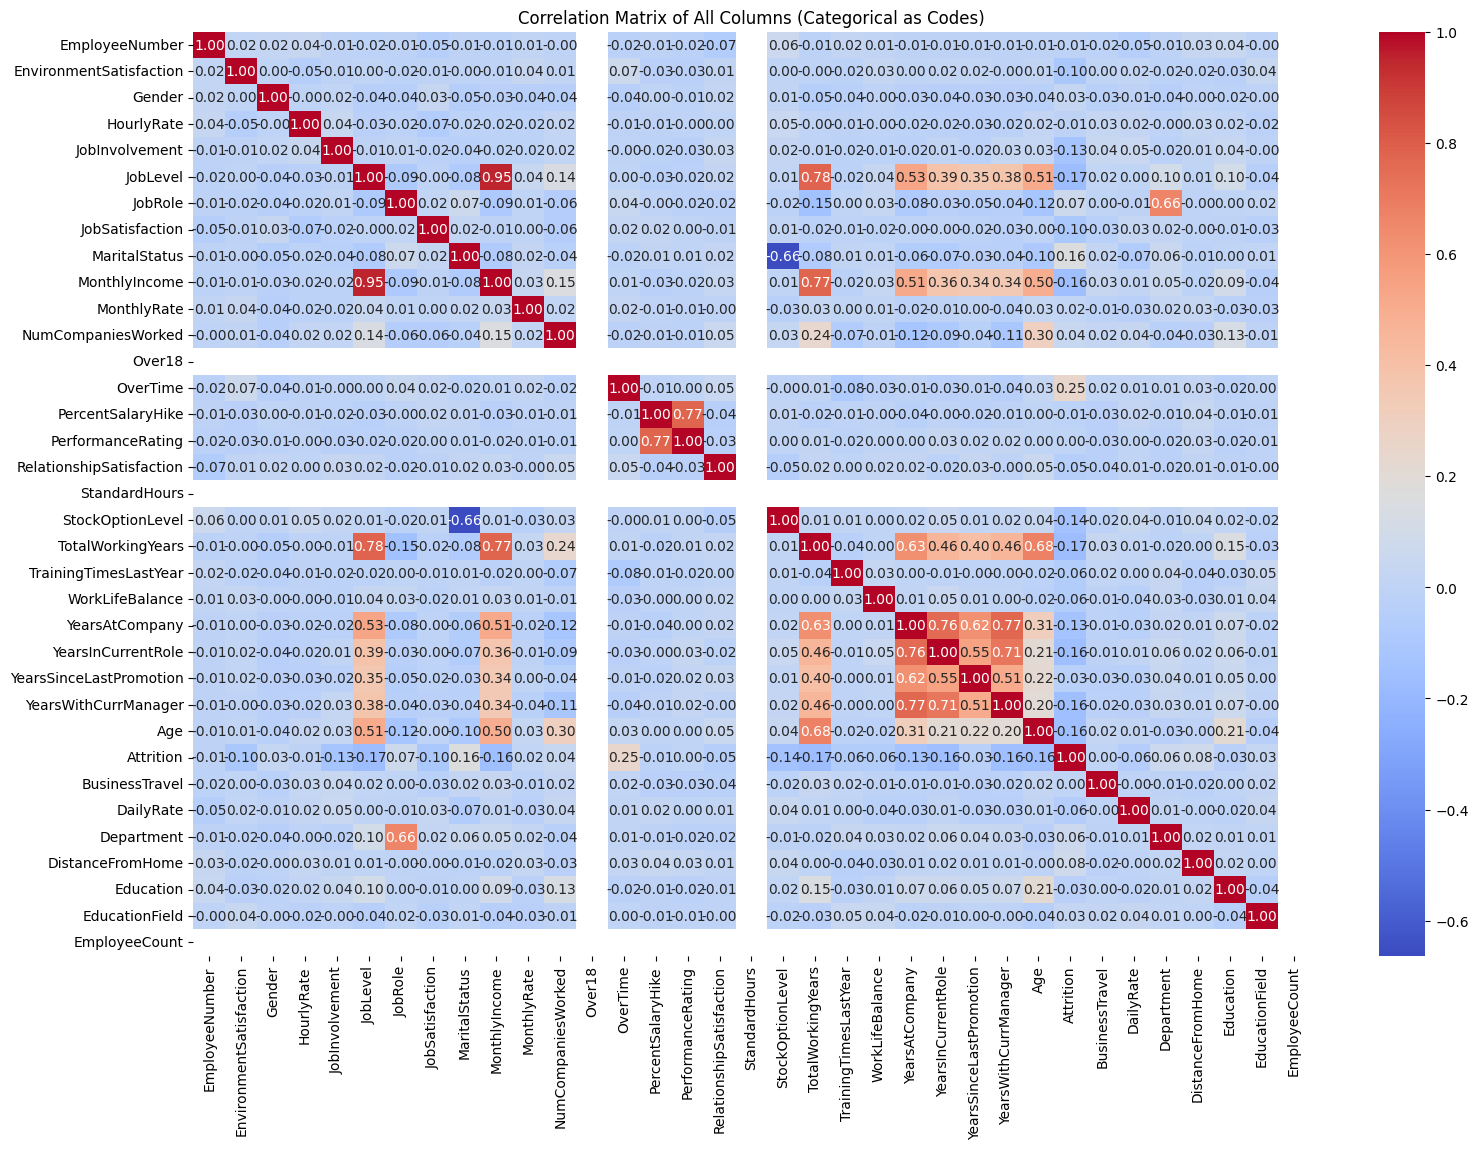

In [6]:
# Check for missing values
print("Missing values per column:")
print(joined_table.isnull().sum())
print("\nNumber of duplicated rows:", joined_table.duplicated().sum())

# Optionally, drop duplicate rows if any
joined_table = joined_table.drop_duplicates()


# Show summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(joined_table.describe())

# Show summary statistics for all columns (including categorical)
print("\nSummary statistics for all columns:")
print(joined_table.describe(include='all'))

# Compute and visualize correlation matrix for all columns that can be represented numerically
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical variables to numeric codes for correlation calculation
corr_df = joined_table.copy()
for col in corr_df.select_dtypes(include=['object', 'category']).columns:
    corr_df[col] = corr_df[col].astype('category').cat.codes

corr_matrix = corr_df.corr()

print("\nCorrelation matrix (numerical representation of all columns):")
print(corr_matrix)

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of All Columns (Categorical as Codes)")
plt.show()



In [7]:
# Clear and concise summary of attrition counts and percentages

# Count attrition: how many employees stayed ("No") vs. left ("Yes")
attrition_counts = joined_table['Attrition'].value_counts()
total_employees = attrition_counts.sum()
num_left = attrition_counts.get("Yes", 0)
num_stayed = attrition_counts.get("No", 0)

percent_left = (num_left / total_employees) * 100 if total_employees > 0 else 0
percent_stayed = (num_stayed / total_employees) * 100 if total_employees > 0 else 0

print("Attrition Breakdown:")
print(f"  Stayed (Attrition == 'No'):  {num_stayed} employees ({percent_stayed:.2f}%)")
print(f"  Left   (Attrition == 'Yes'): {num_left} employees ({percent_left:.2f}%)")

# Key statistics for MonthlyIncome
print("\nMonthlyIncome Statistics (all employees):")
print(f"  Minimum:   {joined_table['MonthlyIncome'].min()}")
print(f"  Maximum:   {joined_table['MonthlyIncome'].max()}")
print(f"  Mean:      {joined_table['MonthlyIncome'].mean():.2f}")
print(f"  Median:    {joined_table['MonthlyIncome'].median():.2f}")
print(f"  Std Dev:   {joined_table['MonthlyIncome'].std():.2f}")
print(f"  Variance:  {joined_table['MonthlyIncome'].var():.2f}")


Attrition Breakdown:
  Stayed (Attrition == 'No'):  1233 employees (83.88%)
  Left   (Attrition == 'Yes'): 237 employees (16.12%)

MonthlyIncome Statistics (all employees):
  Minimum:   1009
  Maximum:   19999
  Mean:      6502.93
  Median:    4919.00
  Std Dev:   4707.96
  Variance:  22164857.07


In [8]:
# To get the mean MonthlyIncome for employees who left (Attrition == "Yes"):
mean_left = joined_table.loc[joined_table['Attrition'] == "Yes", 'MonthlyIncome'].mean()
print("Mean MonthlyIncome for employees who left (Attrition == 'Yes'):", mean_left)

Mean MonthlyIncome for employees who left (Attrition == 'Yes'): 4787.0928270042195


In [9]:
mean_stayed = joined_table.loc[joined_table['Attrition'] == "No", 'MonthlyIncome'].mean()
print("Mean MonthlyIncome for employees who stayed (Attrition == 'No'):", mean_stayed)

Mean MonthlyIncome for employees who stayed (Attrition == 'No'): 6832.739659367397


/var/folders/v0/18l_2hsj79dg_3m84wn5kmdc0000gq/T/ipykernel_97338/2718206356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=joined_table, x="Attrition", y="MonthlyIncome", palette="Set2")


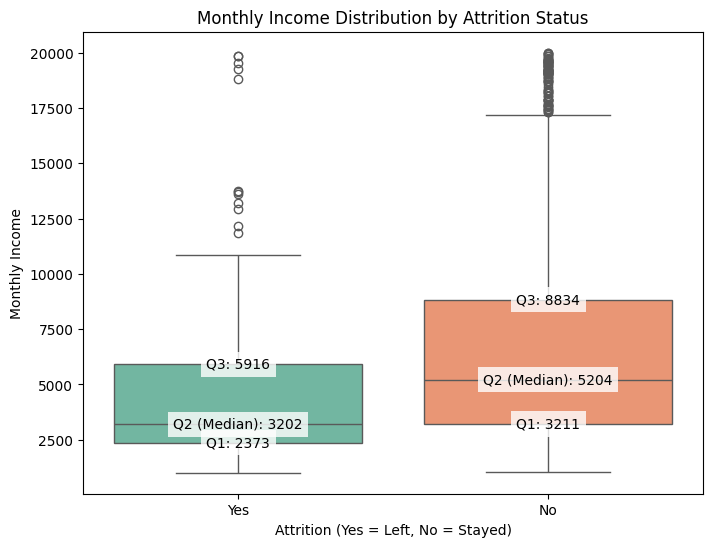

/var/folders/v0/18l_2hsj79dg_3m84wn5kmdc0000gq/T/ipykernel_97338/2718206356.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(data=joined_table, x="Attrition", y="MonthlyIncome", palette="Set2", inner=None)
/var/folders/v0/18l_2hsj79dg_3m84wn5kmdc0000gq/T/ipykernel_97338/2718206356.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=joined_table, x="Attrition", y="MonthlyIncome",


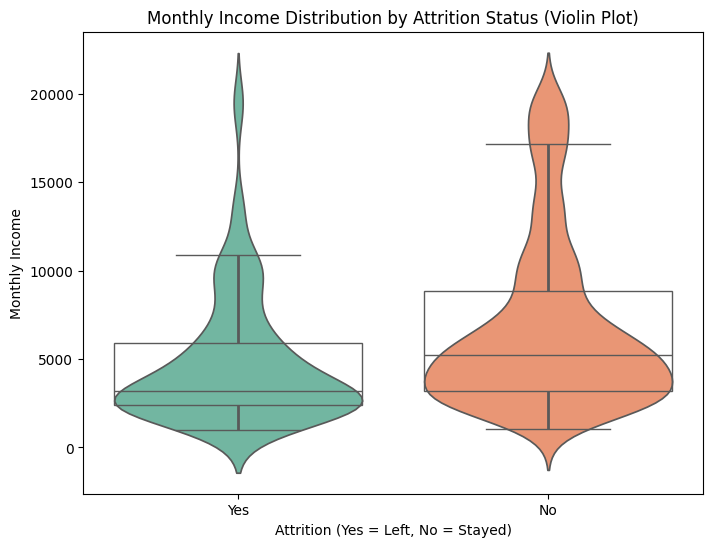


Mean Monthly Income by Attrition Status:
Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

Monthly Income Quartiles by Attrition Status:
               Q1  Q2 (Median)      Q3
Attrition                             
No         3211.0       5204.0  8834.0
Yes        2373.0       3202.0  5916.0


In [15]:
import matplotlib.pyplot as plt

# Boxplot of MonthlyIncome by Attrition, annotate *precise* locations of quartiles on the correct part of each box using y axis placement only (horizontal centering, no x offset).
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=joined_table, x="Attrition", y="MonthlyIncome", palette="Set2")
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Attrition (Yes = Left, No = Stayed)')
plt.ylabel('Monthly Income')

# Calculate quartiles for each group
quartiles = joined_table.groupby("Attrition")["MonthlyIncome"].quantile([0.25, 0.5, 0.75]).unstack()

# Use tick positions to place the labels exactly at the boxes
for i, attr in enumerate(boxplot.get_xticklabels()):
    attr_text = attr.get_text()
    if attr_text in quartiles.index:
        for q_val, label in zip([0.25, 0.5, 0.75], ["Q1", "Q2 (Median)", "Q3"]):
            y = quartiles.loc[attr_text, q_val]
            plt.annotate(f"{label}: {int(y)}", (i, y),
                         xytext=(0, 0),
                         textcoords="offset points",
                         ha='center', va='center',
                         fontsize=10,
                         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()

# Violin plot of MonthlyIncome by Attrition
plt.figure(figsize=(8, 6))
violin = sns.violinplot(data=joined_table, x="Attrition", y="MonthlyIncome", palette="Set2", inner=None)
plt.title('Monthly Income Distribution by Attrition Status (Violin Plot)')
plt.xlabel('Attrition (Yes = Left, No = Stayed)')
plt.ylabel('Monthly Income')

# Overlay boxplot for reference on violin
sns.boxplot(data=joined_table, x="Attrition", y="MonthlyIncome", 
            showcaps=True, boxprops={'facecolor':'None'}, showfliers=False,
            whiskerprops={'linewidth':2}, palette="Set2", ax=plt.gca())

plt.show()

# Show mean monthly income for each attrition group
mean_income_by_attrition = joined_table.groupby("Attrition")["MonthlyIncome"].mean()
print("\nMean Monthly Income by Attrition Status:")
print(mean_income_by_attrition)

# Show quartiles for each attrition group
quartiles_renamed = quartiles.rename(columns={0.25: "Q1", 0.5: "Q2 (Median)", 0.75: "Q3"})
print("\nMonthly Income Quartiles by Attrition Status:")
print(quartiles_renamed)


The boxplot shows a clear income gap between employees who left the company and those who stayed. Employees who left have a much lower income distribution: their median salary is around $3,000, and half of them fall into a low-income range. Even though their mean is higher ($4,787), it is pulled up by a few high-income outliers.

In contrast, employees who stayed earn noticeably more. Their median income is close to the upper quartile of the employees who left, and 50% of them earn between roughly $2,370 and $5,915.

Overall, the plot suggests that lower income is strongly associated with higher attrition, as employees with higher salaries tend to remain in the company.

/var/folders/v0/18l_2hsj79dg_3m84wn5kmdc0000gq/T/ipykernel_97338/144415214.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = joined_table.groupby('SalaryLevel').apply(
/var/folders/v0/18l_2hsj79dg_3m84wn5kmdc0000gq/T/ipykernel_97338/144415214.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = joined_table.groupby('SalaryLevel').apply(


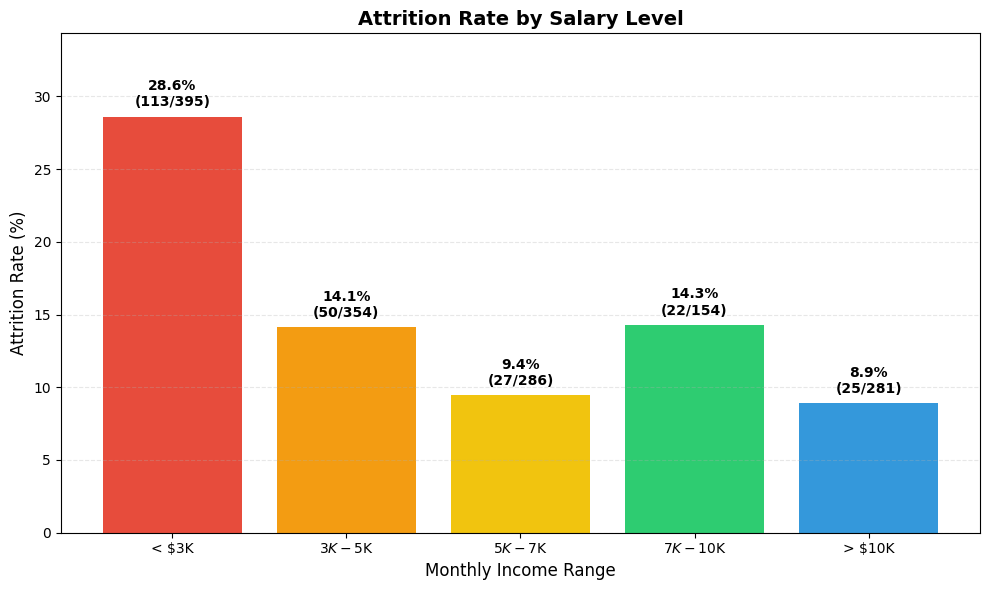


Attrition Rate by Salary Level:
SalaryLevel   n Attrition=Yes AttritionRate (%)
      < $3K 395           113         28.607595
    $3K-$5K 354            50         14.124294
    $5K-$7K 286            27          9.440559
   $7K-$10K 154            22         14.285714
     > $10K 281            25          8.896797


In [11]:
# Create salary bins and calculate attrition rates for each bin
# This provides a more direct view of the relationship between salary levels and attrition rates

# Define salary bins
salary_bins = [0, 3000, 5000, 7000, 10000, 20000]
salary_labels = ['< $3K', '$3K-$5K', '$5K-$7K', '$7K-$10K', '> $10K']

# Create salary level column
joined_table['SalaryLevel'] = pd.cut(joined_table['MonthlyIncome'], 
                                     bins=salary_bins, 
                                     labels=salary_labels, 
                                     include_lowest=True)

# Calculate correct counts and attrition percentages for each salary level
summary = joined_table.groupby('SalaryLevel').apply(
    lambda df: pd.Series({
        'Total': len(df),
        'AttritionYes': (df['Attrition'] == 'Yes').sum()
    })
).reset_index()

# Safely calculate attrition rate (avoid zero division)
summary['AttritionRate'] = summary.apply(
    lambda row: (row['AttritionYes'] / row['Total'] * 100) if row['Total'] > 0 else 0,
    axis=1
)

# Create bar chart using corrected data
plt.figure(figsize=(10, 6))
bars = plt.bar(summary['SalaryLevel'], summary['AttritionRate'], 
               color=['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#3498db'])
plt.title('Attrition Rate by Salary Level', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Income Range', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.ylim(0, max(summary['AttritionRate'].max(), 1) * 1.2)

# Add value labels on top of bars (correct percent & counts)
for i, bar in enumerate(bars):
    rate = summary.loc[i, 'AttritionRate']
    total = summary.loc[i, 'Total']
    attr_yes = summary.loc[i, 'AttritionYes']
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{rate:.1f}%\n({attr_yes}/{total})', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nAttrition Rate by Salary Level:")
print(summary[['SalaryLevel', 'Total', 'AttritionYes', 'AttritionRate']].to_string(index=False,
      header=['SalaryLevel', 'n', 'Attrition=Yes', 'AttritionRate (%)']))



In [14]:
# KPI: Average Monthly Income by Attrition Status
# Calculate average monthly income by Attrition status
avg_income_by_attrition = joined_table.groupby('Attrition')['MonthlyIncome'].mean()

# Print the results in a clear way
print("\nKPI: Average Monthly Income by Attrition Status:")
for status, avg_income in avg_income_by_attrition.items():
    print(f"Attrition = {status:3}: Average Monthly Income = {avg_income:,.2f}")


KPI: Average Monthly Income by Attrition Status:
Attrition = No : Average Monthly Income = 6,832.74
Attrition = Yes: Average Monthly Income = 4,787.09


Employees who stayed with the company have a higher average monthly income ($6,832) compared to those who left ($4,787). However, this KPI is influenced by the mean, which is sensitive to extreme values. In this dataset, a small number of employees earn very high salaries (e.g., $15K–$20K), which pulls the average upward and makes the income difference appear larger than what most employees actually experience.

This is why the mean is higher than the median and why it may exaggerate the differences between groups. Even so, the KPI still supports the overall pattern: employees with lower salaries are more likely to leave the company.

In conclusion, improving compensation for lower-income employees could meaningfully reduce attrition and help retain talent.